In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data = np.array([[.8,.8,1], [1,1,1],[1.2,0.8,1], [.8,1.2,1], \
[1.2,1.2,1], [4,3,2], [3.8,2.8,2], [4.2,2.8,2], [3.8,3.2,2], \
[4.2,3.2,2], [4.4,2.8,2], [4.4,3.2,2], [3.2,0.4,3], [3.2,0.7,3], [3.8,0.5,3], \
[3.5,1,3], [4,1,3], [4,7,3]])

In [12]:
#Shuffling the dataset
np.random.shuffle(data)

X = data[:,0:2]
y = data[:,2]

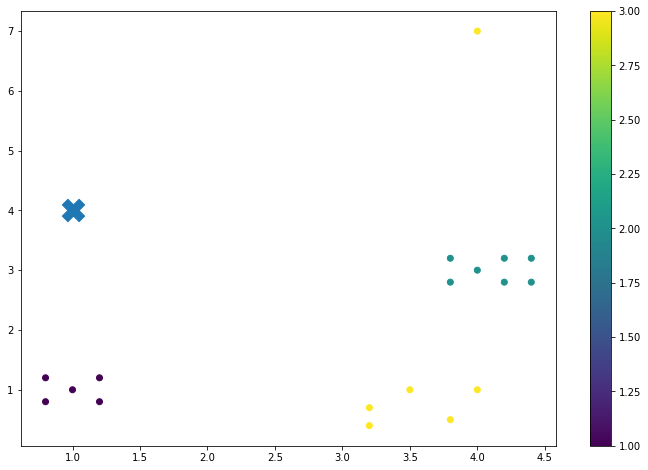

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()
example = np.random.randint(low=0, high=5, size=(1,2))
plt.scatter(example[0,0],example[0,1], marker='X', s=500)

In [14]:
distance = ((X - example) ** 2).sum(axis = 1)

In [15]:
sorted_class = y[distance.argsort()]
sorted_distance = np.sort(distance)

In [16]:
sorted_distance

array([  7.88,   7.88,   8.48,   9.  ,   9.28,  10.  ,  10.28,  10.28,
        10.88,  11.68,  12.2 ,  13.  ,  15.25,  15.73,  17.8 ,  18.  ,
        18.  ,  20.09])

In [17]:
sorted_class

array([ 1.,  1.,  2.,  1.,  2.,  2.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,
        3.,  3.,  3.,  3.,  3.])

# Method 1

In [18]:
k = 7
no_class = 3
m = 2

In [19]:
target_matrix = np.zeros((no_class,k))
for i in range(0,k):
    target_matrix[int(sorted_class[i]-1),i] = 1

In [20]:
target_matrix

array([[ 1.,  1.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [21]:
tmp = target_matrix*(1/sorted_distance[:k] ** (m-1))
mu = np.sum(tmp, axis = 1)/np.sum((1/sorted_distance[:k] ** (m-1)))
print(mu)

[ 0.58663232  0.41336768  0.        ]


In [22]:
belong = mu.argmax() + 1

In [23]:
print("The following example belongs to ", belong)

The following example belongs to  1


# Method 2

In [24]:
k = 7
no_class = 3
m = 10

In [25]:
target_matrix = np.ones((no_class,k))*.05
for i in range(0,k):
    target_matrix[int(sorted_class[i]-1),i] = .99

In [26]:
target_matrix

array([[ 0.99,  0.99,  0.05,  0.99,  0.05,  0.05,  0.99],
       [ 0.05,  0.05,  0.99,  0.05,  0.99,  0.99,  0.05],
       [ 0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05]])

In [27]:
tmp = target_matrix*(1/sorted_distance[:k] ** (m-1))
mu = np.sum(tmp, axis = 1)/np.sum((1/sorted_distance[:k] ** (m-1)))
print(mu)

[ 0.74085127  0.29914873  0.05      ]


In [28]:
belong = mu.argmax() + 1

In [29]:
print("The following example belongs to ", belong)

The following example belongs to  1


# Method 3

In [30]:
k = 7
no_class = 3
m = 10

In [31]:
def membership(n, i, j):
    if i == j:
        return (0.51 + (n/k) * .49)
    return ((n/k) * .49)

In [32]:
votes = np.unique(sorted_class[:k], return_counts=True)
votes_class = np.zeros((no_class))
class_ = 0
for i in votes[0]:
    votes_class[int(i-1)] = votes[1][class_]
    class_ = class_ + 1
votes_class

array([ 4.,  3.,  0.])

In [33]:
target_matrix = np.ones((no_class,k))
for i in range(0,k):
    for j in range(0,no_class):
        target_matrix[j,i] = membership(votes_class[j], j+1, sorted_class[i])

In [34]:
target_matrix

array([[ 0.79,  0.79,  0.28,  0.79,  0.28,  0.28,  0.79],
       [ 0.21,  0.21,  0.72,  0.21,  0.72,  0.72,  0.21],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [35]:
tmp = target_matrix*(1/sorted_distance[:k] ** (m-1))
mu = np.sum(tmp, axis = 1)/np.sum((1/sorted_distance[:k] ** (m-1)))
print(mu)

[ 0.65482356  0.34517644  0.        ]


In [36]:
belong = mu.argmax() + 1

In [37]:
print("The following example belongs to ", belong)

The following example belongs to  1
